In [21]:
# Liberman MC. Auditory-nerve response from cats raised in a low-noise chamber. J Acoust Soc Am. 1978 Feb;63(2):442-55. doi: 10.1121/1.381736. PMID: 670542.
# Data from Fig. 9. Reverse-engineered from the figure using PlotDigitizer
x = [1.407035175879397, 2.512562814070352, 3.5175879396984926, 4.42211055276382, 6.030150753768845, 7.5376884422110555, 8.944723618090453, 9.949748743718594, 10.552763819095478, 11.959798994974875, 13.266331658291458, 13.969849246231156, 15.27638190954774, 17.68844221105528, 21.608040201005025, 22.91457286432161, 24.824120603015075, 26.532663316582916, 29.14572864321608, 31.457286432160807, 35.175879396984925, 38.29145728643216, 39.798994974874375, 40.90452261306533, 42.814070351758794, 43.81909547738694, 44.824120603015075, 46.33165829145729, 48.24120603015076, 49.84924623115578, 50.85427135678392, 51.85929648241206, 53.26633165829146, 54.47236180904523, 55.879396984924625, 57.286432160804026, 58.69346733668342, 60.301507537688444, 61.80904522613066, 63.21608040201005, 64.82412060301507, 65.82914572864323, 66.4321608040201, 67.33668341708542, 68.14070351758794, 69.2462311557789, 70.05025125628141, 71.05527638190955, 71.75879396984925, 72.46231155778895, 73.76884422110552, 75.678391959799, 77.28643216080403, 80.10050251256281, 81.60804020100502, 82.8140703517588, 83.71859296482413, 85.7286432160804, 87.43718592964825, 88.74371859296483, 89.44723618090453, 90.95477386934674, 91.95979899497488, 92.8643216080402, 93.66834170854271, 94.57286432160805, 95.77889447236181, 97.68844221105527, 100, 4.92462311557789, 18.99497487437186, 36.78391959798995, 42.01005025125628, 78.79396984924624, 84.72361809045226]
y = [146.59070926143025, 23.91559202813599, 22.790152403282534, 19.976553341148886, 17.02447245017585, 9.988276670574443, 15.756154747948418, 3.0949589683470107, 4.642438452520516, 6.75263774912075, 5.6271981242672915, 2.1101992966002343, 2.954279015240328, 1.6881594372801876, 1.5496776084407973, 2.8157971864009377, 2.8157971864009377, 1.5496776084407973, 1.5496776084407973, 3.6598769050410316, 3.6576787807737396, 2.8157971864009377, 3.6598769050410316, 5.4865181711606095, 1.8310375146541618, 5.488716295427902, 4.644636576787808, 5.488716295427902, 3.941236811254396, 7.317555685814772, 3.941236811254396, 7.317555685814772, 4.78531652989449, 11.678634232121922, 12.522713950762016, 11.678634232121922, 15.336313012895662, 7.458235638921454, 13.507473622508792, 7.458235638921454, 15.336313012895662, 10.553194607268464, 15.336313012895662, 17.446512309495898, 17.305832356389214, 13.36679366940211, 9.849794841735052, 7.458235638921454, 5.488716295427902, 7.317555685814772, 11.256594372801876, 12.241354044548652, 6.473475967174678, 6.473475967174678, 8.161635404454865, 3.378516998827667, 9.287075029308324, 4.925996483001172, 4.222596717467761, 2.6751172332942557, 4.222596717467761, 9.425556858147713, 6.332796014067996, 3.2378370457209846, 3.0971570926143026, 1.4089976553341148, 2.2530773739742087, 1.4089976553341148, 4.220398593200469, 11.957796014067995, 1.6881594372801876, 3.6576787807737396, 5.4865181711606095, 9.566236811254397, 4.3610785463071515]

# Round every value in y to the nearest integer
y = [int(round(i)) for i in y]
L = [(x[i], y[i]) for i in range(len(x))]

L.sort(key=lambda x: x[0])

# Merge duplicates in L eg. [(1, 2), (1, 2), (1, 3)] -> [(1, 4), (1, 3)]
for i in range(len(L) - 1):
    if L[i][0] == L[i + 1][0]:
        L[i + 1] = (L[i][0], L[i][1] + L[i + 1][1])
        L[i] = None
L = [i for i in L if i is not None]
sum_y = sum([i[1] for i in L])
L = [(i[0], i[1] / sum_y) for i in L]

values = [i[0] for i in L]
probabilities = [i[1] for i in L]

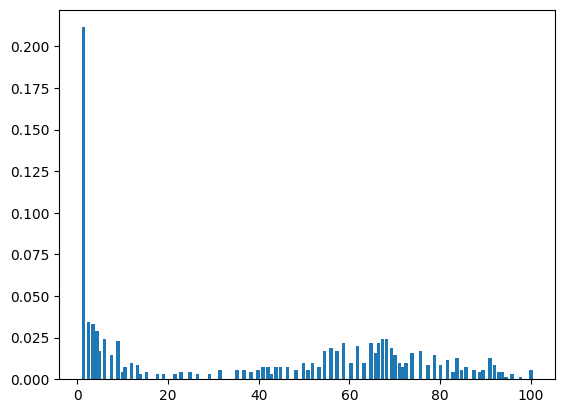

In [22]:
import matplotlib.pyplot as plt


# Plot the distribution
plt.bar(values,probabilities)
plt.show()



In [23]:
import numpy as np

rng = np.random.default_rng()

def get_value():
    return rng.choice(values, p=probabilities)

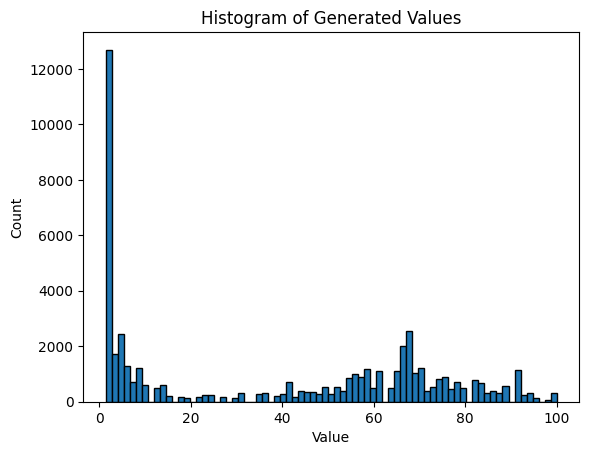

In [25]:
import matplotlib.pyplot as plt

# Create a default Generator.
rng = np.random.default_rng()

# Generate a large number of values.
num_values = 52000
generated_values = [get_value() for _ in range(num_values)]

# Plot a histogram of the generated values.
plt.hist(generated_values, bins=len(values), edgecolor='black')
plt.title('Histogram of Generated Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


In [30]:
# Count values that are less than or equal to 50.
num_less_than_or_equal_to_50 = sum(1 for i in generated_values if i <= 20)
print(num_less_than_or_equal_to_50 / len(generated_values))
# Seems to be around 40% which matches the value quoted from "Understanding the Cochlea"
# Calculate the median of the generated values.
median = np.median(generated_values)
print(median)


0.42846153846153845
44.824120603015075


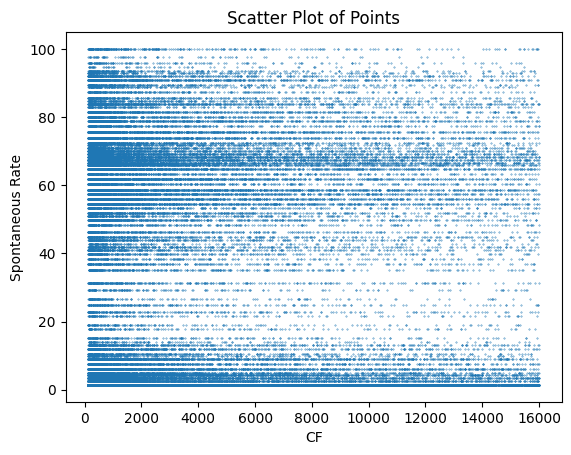

In [38]:
from model.bez2018model import get_ERB_cf_list

NUM_ANF = 18
NUM_IHC = 3500

cf_list = get_ERB_cf_list(num_cf=NUM_IHC, min_cf=125,max_cf=16e3,)

sponts = [[get_value() for __ in range(NUM_ANF)] for _ in range(NUM_IHC)]
sponts = np.array(sponts)
Points = []
for i in range(NUM_IHC):
    for spont in sponts[i]:
        Points.append((cf_list[i], spont))

# Plot a cluster plot of Points
plt.scatter([i[0] for i in Points], [i[1] for i in Points], s=0.1)
plt.title('Scatter Plot of Points')
plt.xlabel('CF')
plt.ylabel('Spontaneous Rate')
plt.show()


In [ ]:
print(np.shape(sponts))